### Import libraries

In [36]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

### Functions

In [46]:
# distribution plotting

def distribution(data, attribute, title):
    plt.figure(figsize=(10,5))
    sns.histplot(data[attribute], alpha=0.5)
    plt.axvline(data[attribute].median(), color='r', linestyle='dashed', linewidth=2, label='median value')
    plt.axvline(data[attribute].mean(), color='purple', linestyle='dashed', linewidth=2, label='average value')
    plt.axvline(data[attribute].quantile(0.25), color='r', linestyle='dotted', linewidth=3, label='25% and 75% values')
    plt.axvline(data[attribute].quantile(0.75), color='r', linestyle='dotted', linewidth=3)
    plt.legend()
    plt.title(label=title)
    plt.show()

# water level plotting

def daily_water_level_plot(data, time, station, xlabel, title):
    plt.figure(figsize=(15, 5))
    plt.plot(data[time], data[station])
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel='water level')
    plt.title(label=title)
    plt.show()
    
# date separation 
    
def separate_date(data):
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['week'] = data['date'].dt.isocalendar().week
    data['day'] = data['date'].dt.day
    return data

# statistics for water level grouped by year, month, week
    
def data_stat(data, union_attribute, station):
    data_grouped_by = data.groupby(union_attribute, as_index=False, sort=False)
    data_grouped_by = data_grouped_by[station]
    data_grouped_by = data_grouped_by.agg([np.mean, np. median, np.max, np.std, np.var]).reset_index()
    return data_grouped_by    

### Import dependencies

In [6]:
data = pd.read_csv('merged_wtr-level_alerts_precip_hum_temp_press_wind_with-NaN_v4.csv')
data.head()

,date,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph
0,2000-01-01,461.0,0,503.0,0.0,502.0,0.0,NaN,29.840065,-2.6,89.0,11.52
1,2000-01-02,474.0,0,516.0,0.0,516.0,0.0,0.0,29.925702,-1.3,85.0,5.04
2,2000-01-03,478.0,0,520.0,0.0,520.0,0.0,0.0,29.946373,-1.1,83.0,5.04
3,2000-01-04,474.0,0,517.0,0.0,516.0,0.0,NaN,29.792817,-1.4,93.0,2.16
4,2000-01-05,464.0,0,513.0,0.0,508.0,0.0,NaN,29.783958,-0.9,95.0,5.76


### Data types verification

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8401 non-null   object 
 1   belgrade_water_level_cm    8401 non-null   float64
 2   belgrade_flood_alert       8401 non-null   int64  
 3   pancevo_water_level_cm     8036 non-null   float64
 4   pancevo_flood_alert        8036 non-null   float64
 5   zemun_water_level_cm       8262 non-null   float64
 6   zemun_flood_alert          8262 non-null   float64
 7   belgrade_precipitation_mm  5885 non-null   float64
 8   belgrade_pressure_hg       7671 non-null   float64
 9   belgrade_temperature_c     7671 non-null   float64
 10  belgrade_humidity_pct      7671 non-null   float64
 11  belgrade_windspeed_kph     4018 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 787.7+ KB


In [7]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8401 non-null   datetime64[ns]
 1   belgrade_water_level_cm    8401 non-null   float64       
 2   belgrade_flood_alert       8401 non-null   int64         
 3   pancevo_water_level_cm     8036 non-null   float64       
 4   pancevo_flood_alert        8036 non-null   float64       
 5   zemun_water_level_cm       8262 non-null   float64       
 6   zemun_flood_alert          8262 non-null   float64       
 7   belgrade_precipitation_mm  5885 non-null   float64       
 8   belgrade_pressure_hg       8036 non-null   float64       
 9   belgrade_temperature_c     7671 non-null   float64       
 10  belgrade_humidity_pct      7671 non-null   float64       
 11  belgrade_windspeed_kph     7670 non-null   float64       
dtypes: dat

### Missing values and duplicates check

In [7]:
data.isna().sum()

date                            0
belgrade_water_level_cm         0
belgrade_flood_alert            0
pancevo_water_level_cm        365
pancevo_flood_alert           365
zemun_water_level_cm          139
zemun_flood_alert             139
belgrade_precipitation_mm    2516
belgrade_pressure_hg          730
belgrade_temperature_c        730
belgrade_humidity_pct         730
belgrade_windspeed_kph       4383
dtype: int64

<AxesSubplot: >

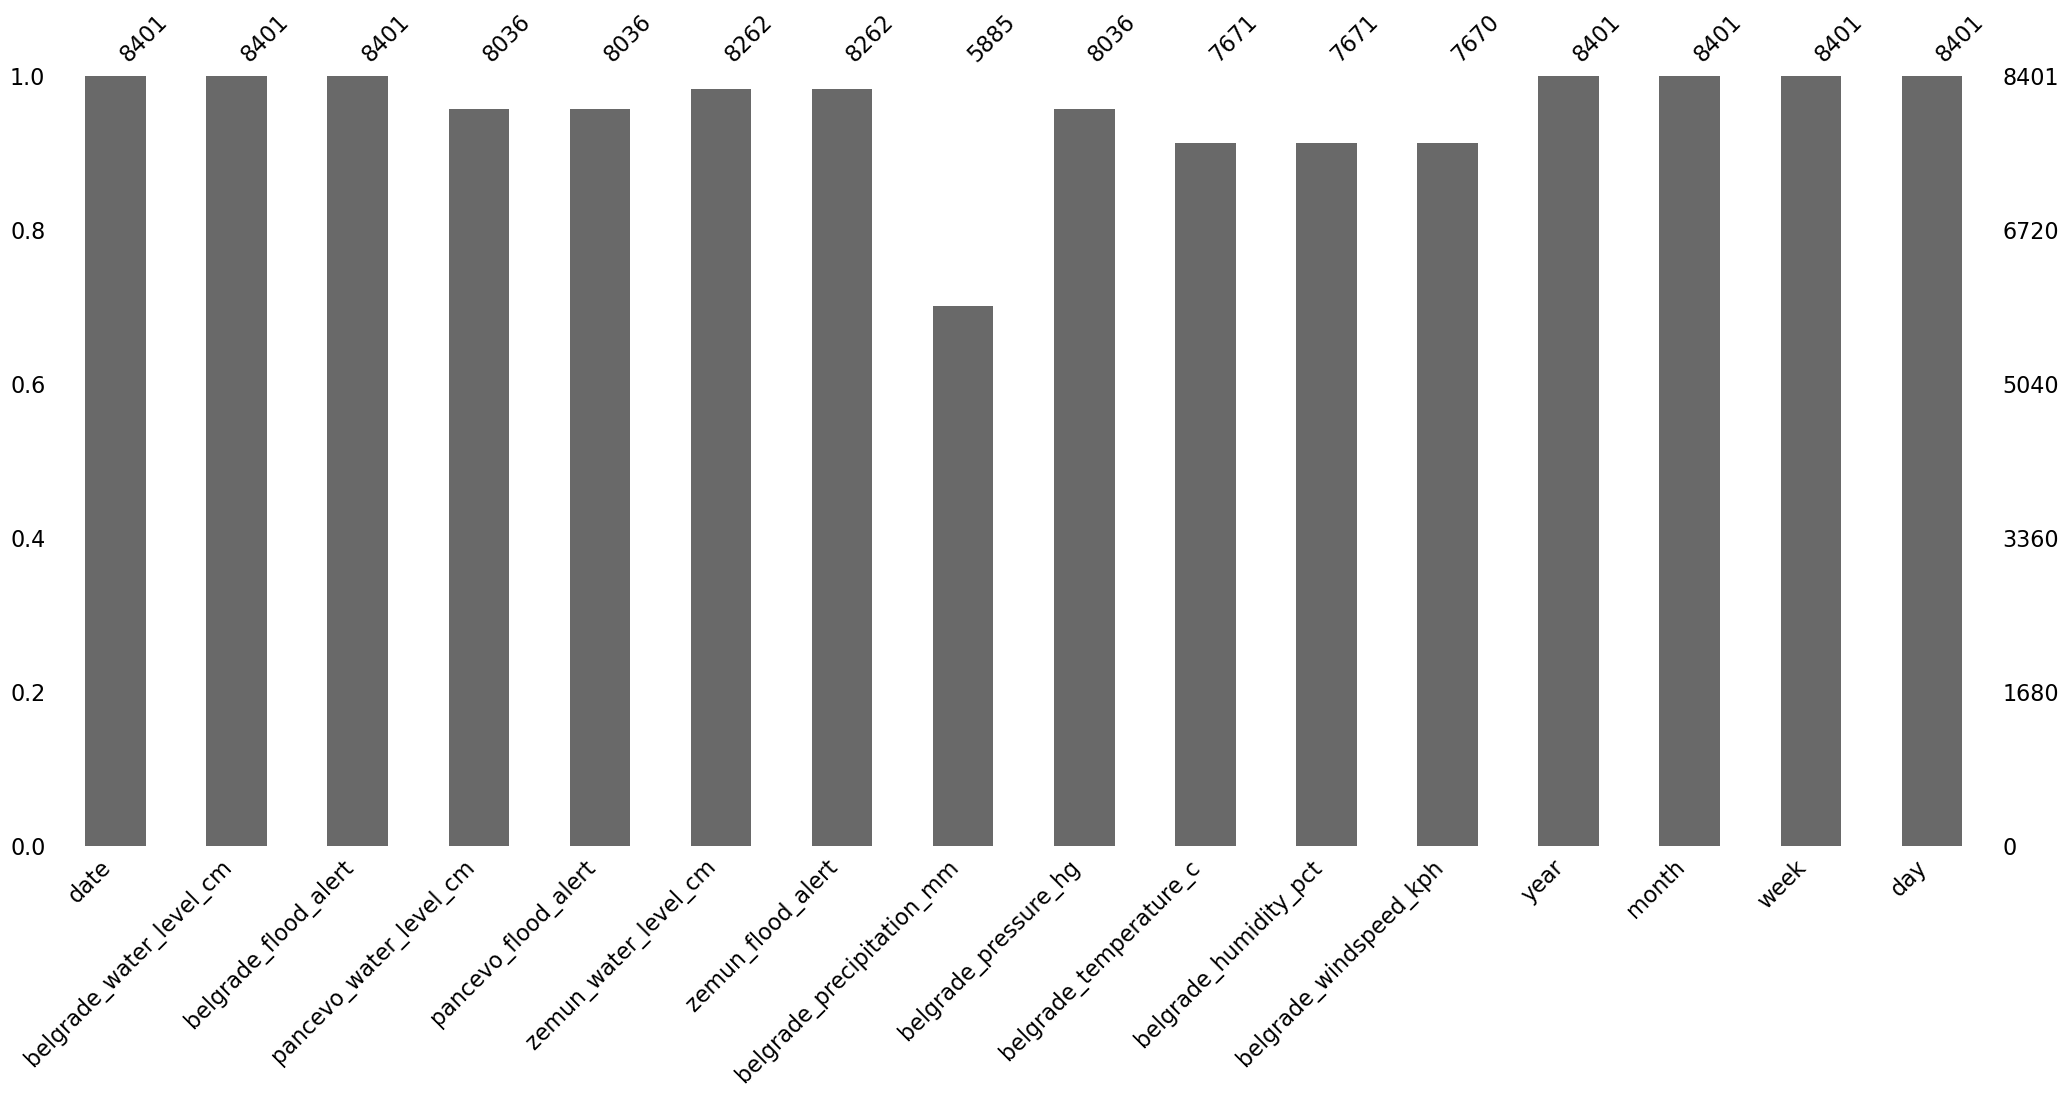

In [38]:
msno.bar(data)

9 variables have missing values.

<AxesSubplot: >

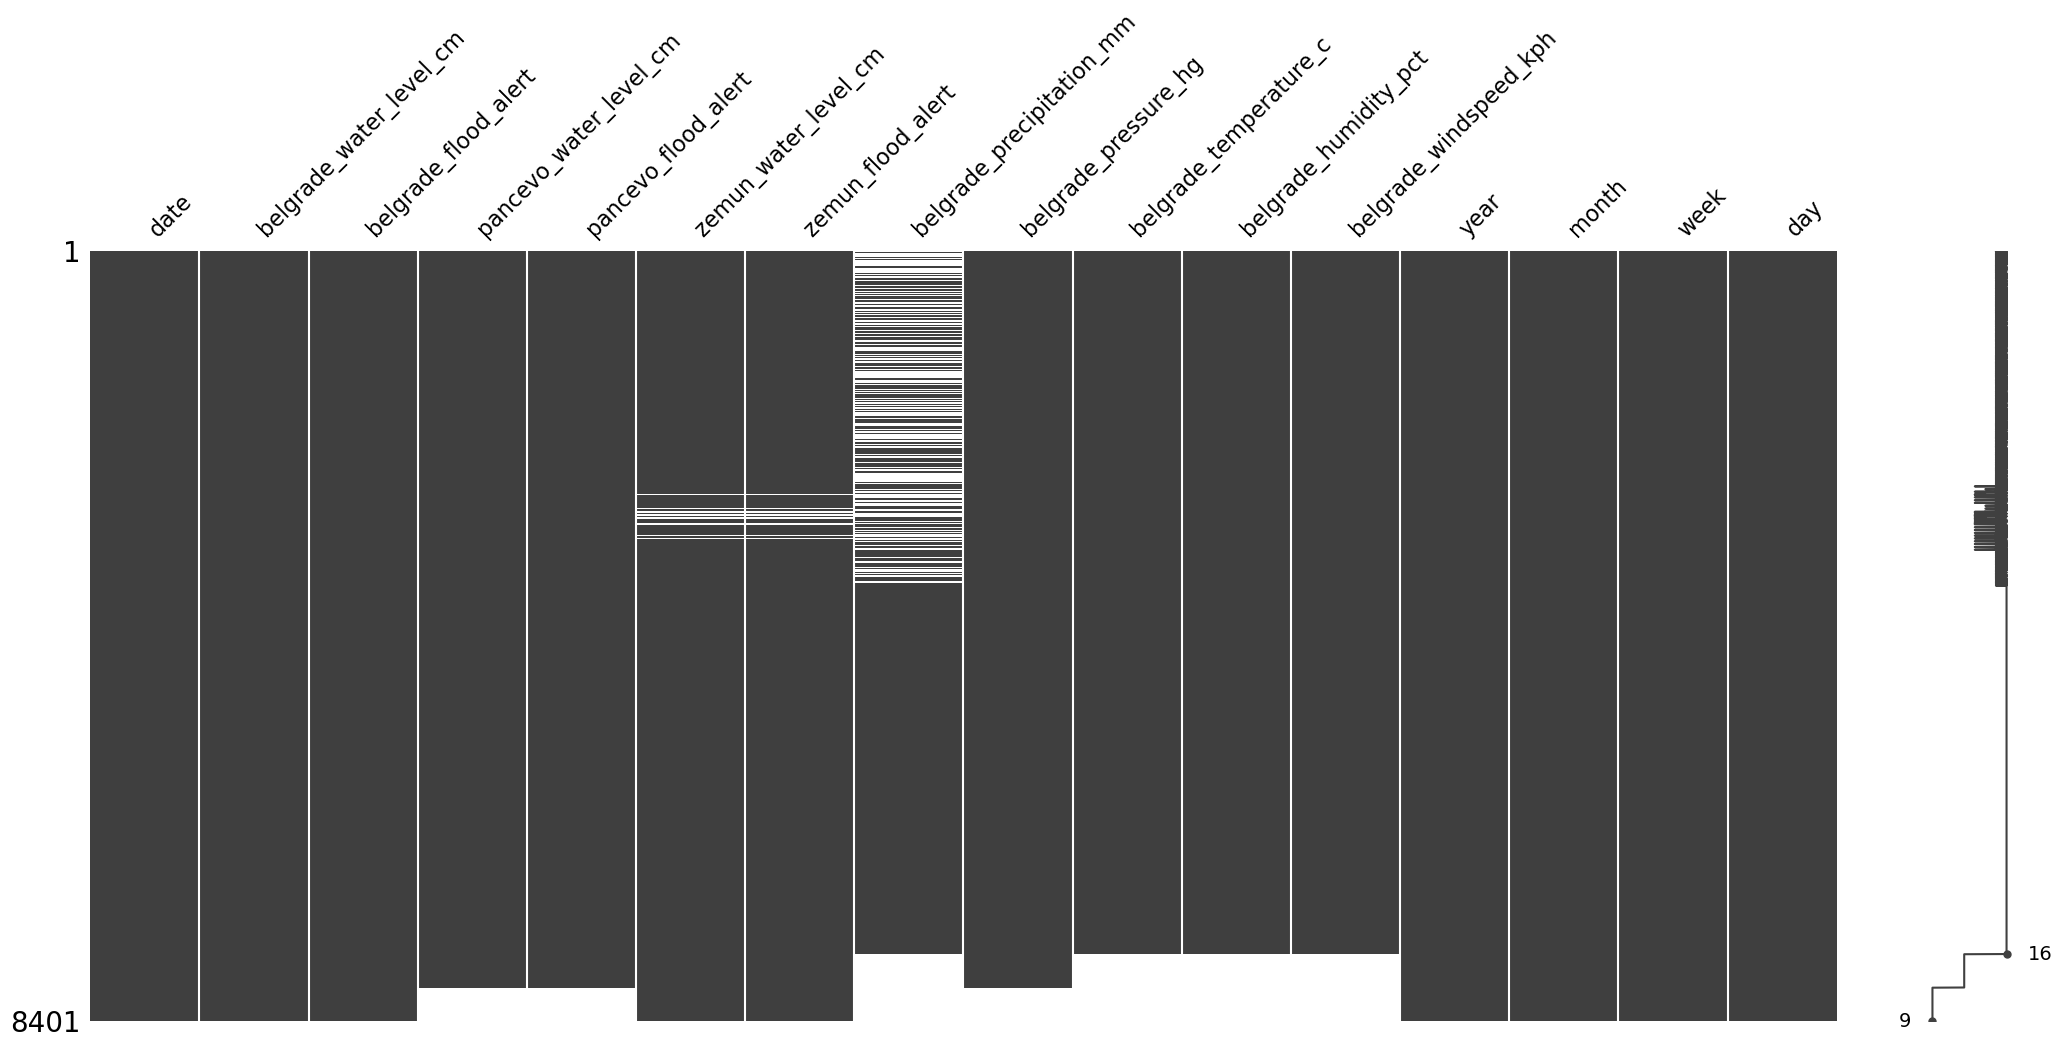

In [39]:
msno.matrix(data)

The measurements is missed before 2010 and after 2020. Therefore, 2010-2020 period does not have missing values.

In [8]:
data.duplicated().any()

False

### Five point summary

In [9]:
data.describe()

,belgrade_water_level_cm,belgrade_flood_alert,pancevo_water_level_cm,pancevo_flood_alert,zemun_water_level_cm,zemun_flood_alert,belgrade_precipitation_mm,belgrade_pressure_hg,belgrade_temperature_c,belgrade_humidity_pct,belgrade_windspeed_kph
count,8401.000000,8401.000000,8036.000000,8036.000000,8262.000000,8262.000000,5885.000000,7671.000000,7671.000000,7671.000000,4018.000000
mean,283.631711,0.039162,353.195869,0.049278,334.384168,0.035464,3.055616,29.810642,13.959119,68.152131,10.693878
std,104.576325,0.193992,89.867574,0.216462,100.685471,0.184960,6.169385,0.315477,9.351961,14.460130,5.339588
min,12.000000,0.000000,112.000000,0.000000,34.000000,0.000000,0.000000,28.729737,-15.000000,23.000000,2.000000
25%,205.000000,0.000000,283.000000,0.000000,256.000000,0.000000,0.000000,29.562483,7.000000,58.000000,7.000000
50%,264.000000,0.000000,335.000000,0.000000,315.000000,0.000000,0.400000,29.830000,14.400000,69.000000,10.000000
75%,345.000000,0.000000,404.000000,0.000000,393.000000,0.000000,3.300000,30.030000,21.400000,79.000000,13.000000
max,738.000000,1.000000,777.000000,1.000000,782.000000,1.000000,94.000000,30.830000,37.000000,100.000000,41.000000


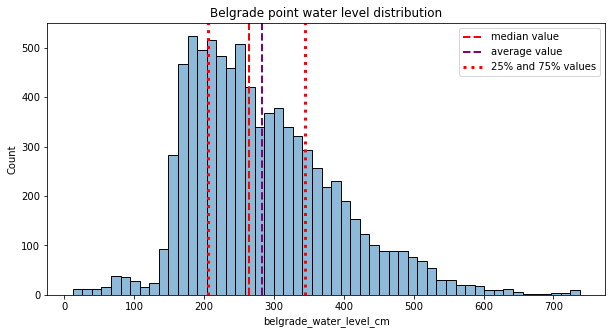

In [15]:
distribution(data, 'belgrade_water_level_cm', 'Belgrade point water level distribution')

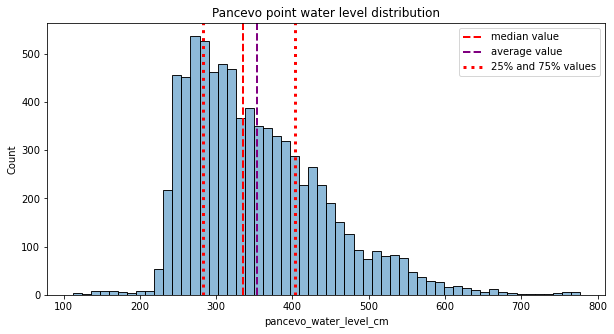

In [16]:
distribution(data, 'pancevo_water_level_cm', 'Pancevo point water level distribution')

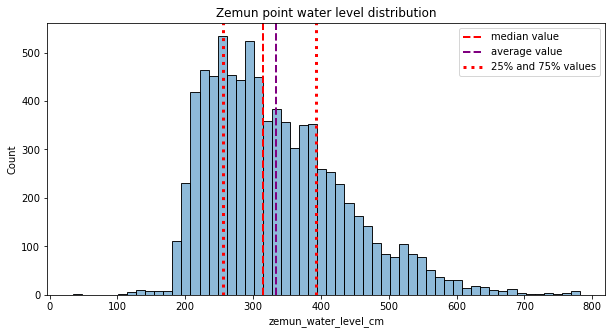

In [17]:
distribution(data, 'zemun_water_level_cm', 'Zemun point w'Belgrade point water level distribution'ater level distribution')

The water level distributions of all stations are very similar and a bit asymmetrically.

### Water level plotting

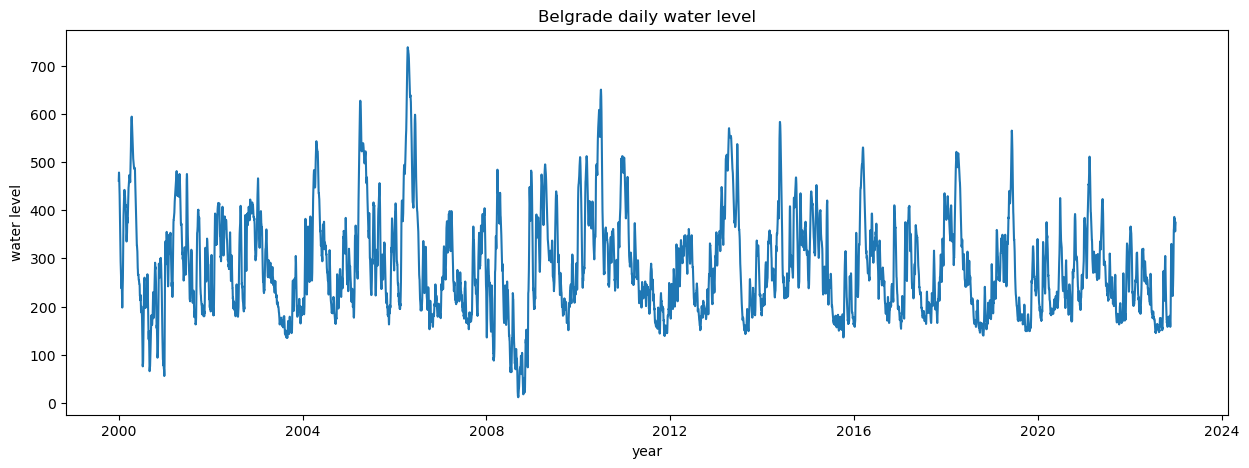

In [28]:
water_level_plot(data, 'date', 'belgrade_water_level_cm', 'year', 'Belgrade daily water level')

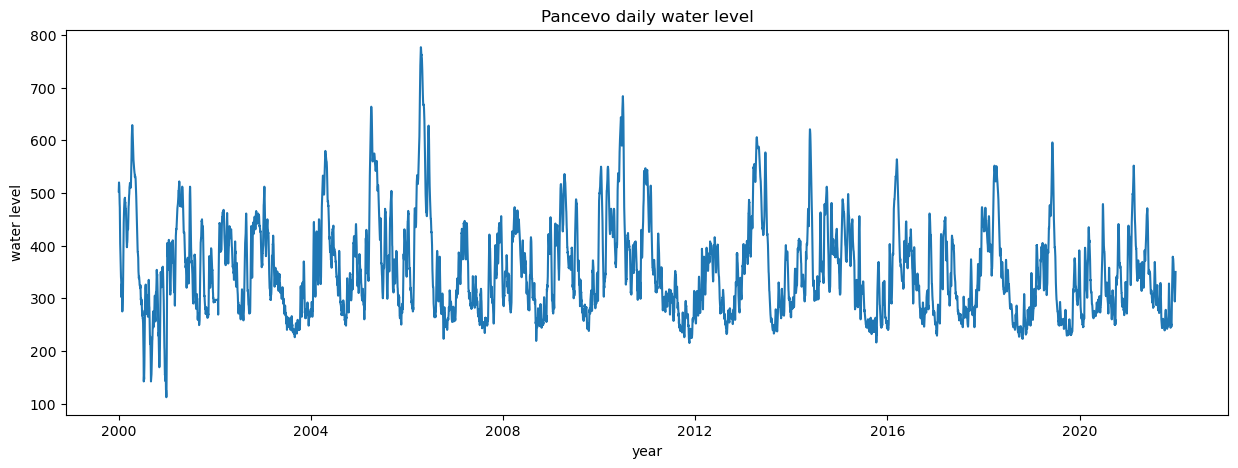

In [29]:
water_level_plot(data, 'date', 'pancevo_water_level_cm', 'year', 'Pancevo daily water level')

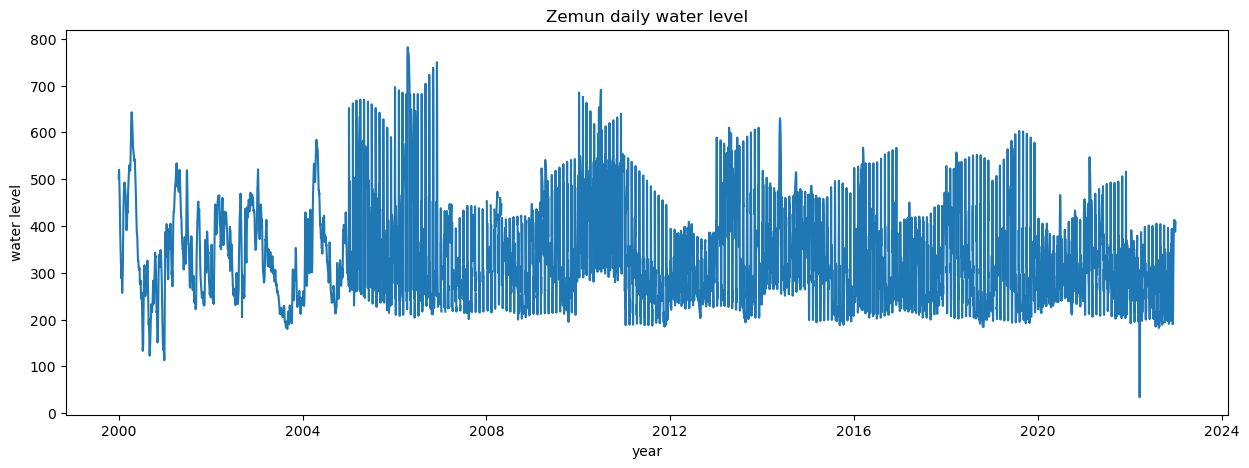

In [30]:
water_level_plot(data, 'date', 'zemun_water_level_cm', 'year', 'Zemun daily water level')

Stations have very similar dynamics. However, Zemun station water level has some abnormal behavior.

In [47]:
# getting dataframes for plotting

# separating the date into years, months, weeks
data = separate_date(data)

belgrade_grouped_by_year = data_stat(data, 'year', 'belgrade_water_level_cm')
belgrade_grouped_by_month = data_stat(data, 'month', 'belgrade_water_level_cm')
belgrade_grouped_by_week = data_stat(data, 'week', 'belgrade_water_level_cm').sort_values(by='week')

pancevo_grouped_by_year = data_stat(data, 'year', 'pancevo_water_level_cm')
pancevo_grouped_by_month = data_stat(data, 'month', 'pancevo_water_level_cm')
pancevo_grouped_by_week = data_stat(data, 'week', 'pancevo_water_level_cm').sort_values(by='week')

zemun_grouped_by_year = data_stat(data, 'year', 'zemun_water_level_cm')
zemun_grouped_by_month = data_stat(data, 'month', 'zemun_water_level_cm')
zemun_grouped_by_week = data_stat(data, 'week', 'zemun_water_level_cm').sort_values(by='week')

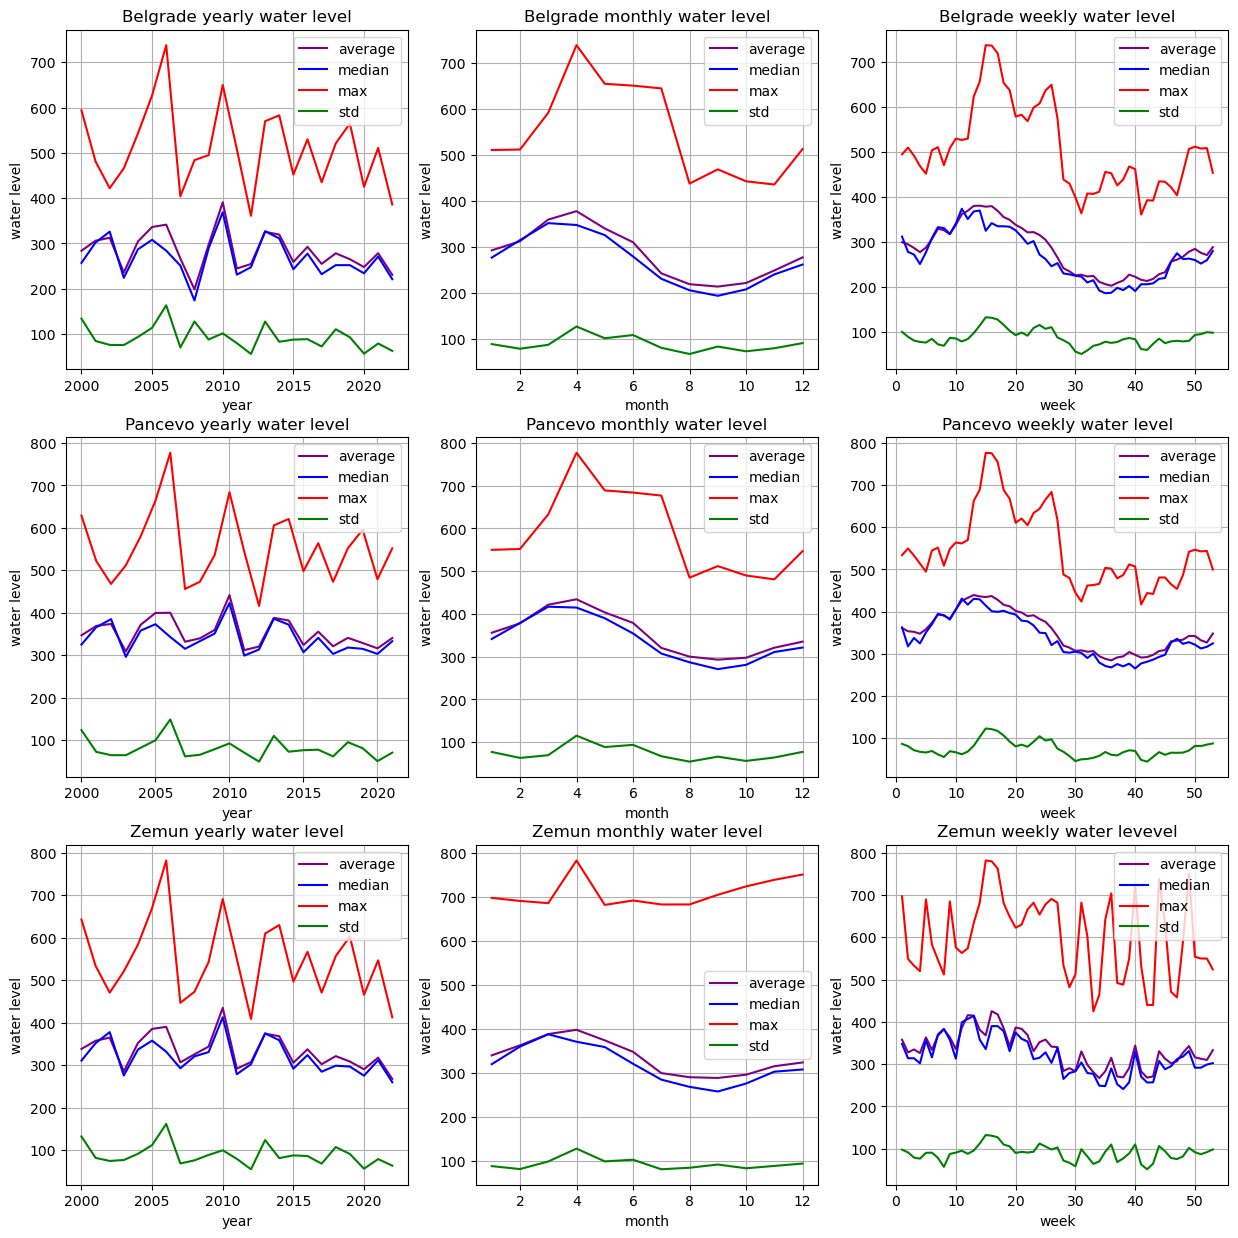

In [48]:
# yearly, monthly and weekly water level plotting   

fig, ax = plt.subplots(3, 3, figsize=(15,15))

def plot_settings(df, union_attribute, i, j, plot_name):
    ax[i,j].plot(df[union_attribute], df['mean'], label="average", c='purple')
    ax[i,j].plot(df[union_attribute], df['median'], label="median", c='b')
    ax[i,j].plot(df[union_attribute], df['amax'], label="max", c='r')
    ax[i,j].plot(df[union_attribute], df['std'], label="std", c='g')
    ax[i,j].legend()
    ax[i,j].set_xlabel(xlabel=union_attribute)
    ax[i,j].set_ylabel(ylabel='water level')
    ax[i,j].set_title(label=plot_name)
    ax[i,j].grid(True) 

plot_settings(belgrade_grouped_by_year, 'year', 0, 0, 'Belgrade yearly water level') 
plot_settings(belgrade_grouped_by_month, 'month', 0, 1, 'Belgrade monthly water level')
plot_settings(belgrade_grouped_by_week, 'week', 0, 2, 'Belgrade weekly water level')
plot_settings(pancevo_grouped_by_year, 'year', 1, 0, 'Pancevo yearly water level')
plot_settings(pancevo_grouped_by_month, 'month', 1, 1, 'Pancevo monthly water level')
plot_settings(pancevo_grouped_by_week, 'week', 1, 2, 'Pancevo weekly water level')
plot_settings(zemun_grouped_by_year, 'year', 2, 0, 'Zemun yearly water level')
plot_settings(zemun_grouped_by_month, 'month', 2, 1, 'Zemun monthly water level')
plot_settings(zemun_grouped_by_week, 'week', 2, 2, 'Zemun weekly water levevel')

The graphs show the following:
1. Yearly water levels of all stations have very similar dynamics. Especially, Pancevo and Zemun have almost identical values. 
2. Water level increases from February and decreases from July. The water level remains high between these two months.
3. Zemun weekly water level seems to have periodical water consumers.

### Other features plotting

array([[<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >],
       [<AxesSubplot: >]], dtype=object)

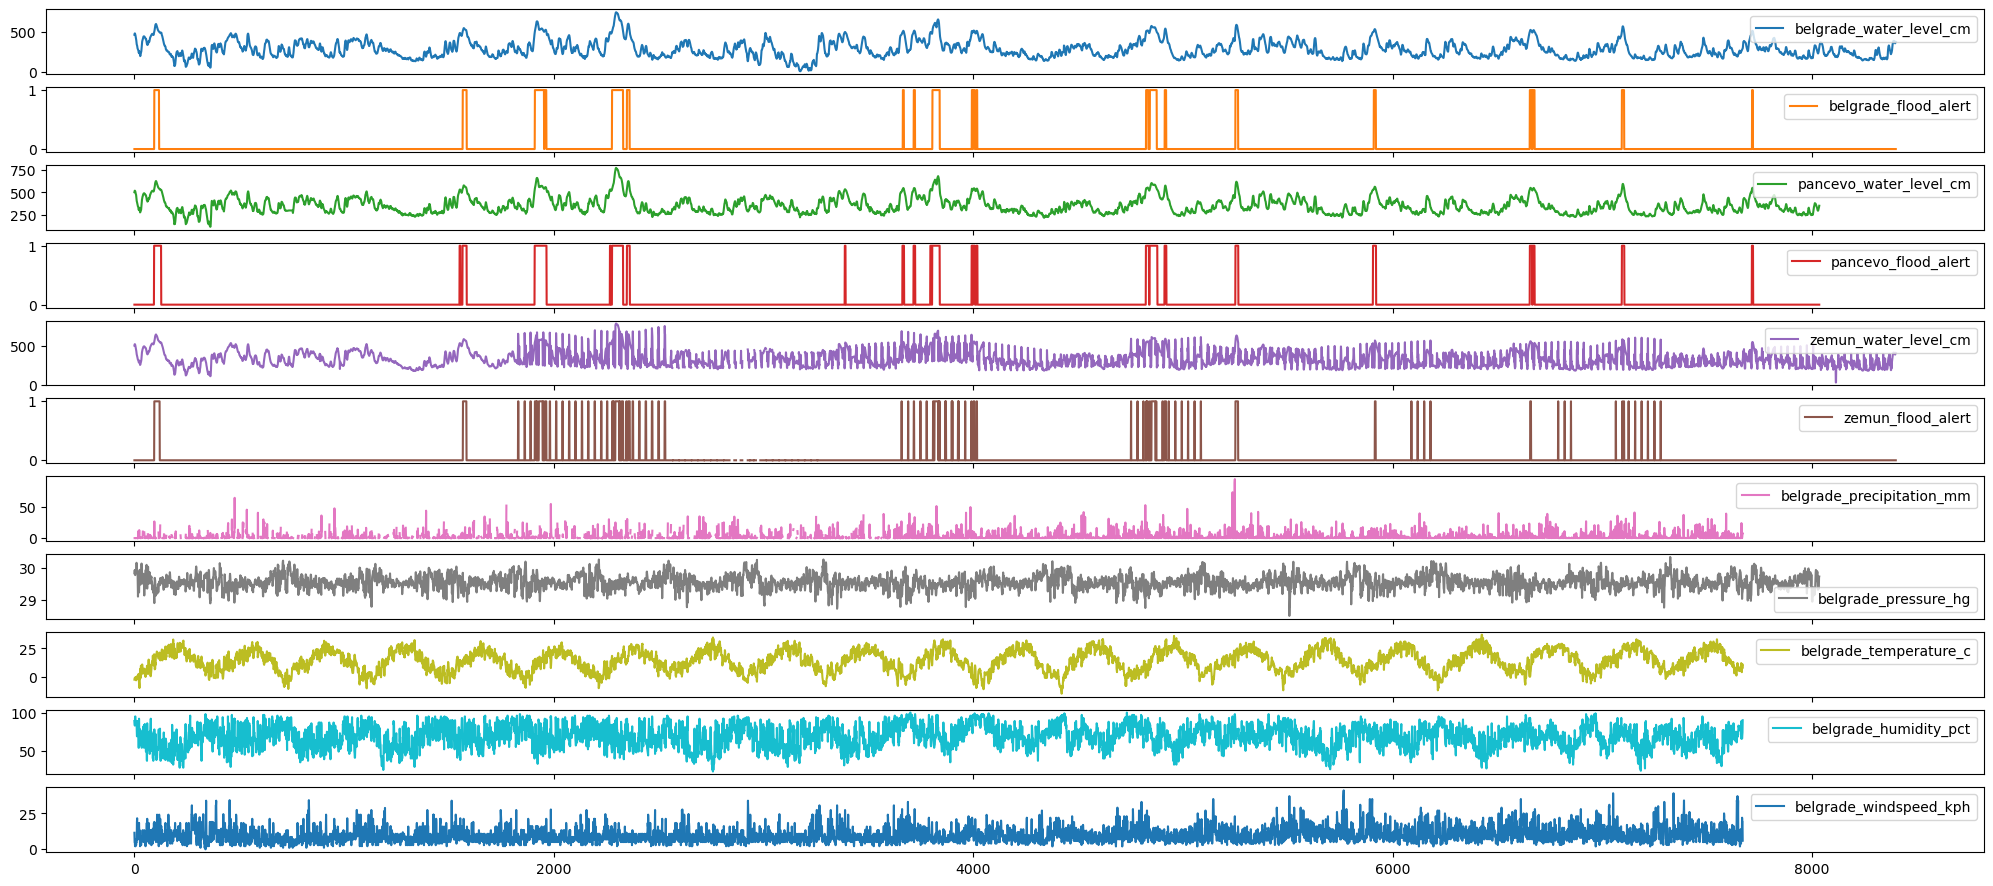

In [51]:
# features simple visualization

data.drop(columns={'date', 'year', 'month', 'week', 'day'})\
.plot(figsize = (25, 16), subplots=True, layout=(len(data.columns),1))

The graphs show that a high water level does not always follow precipitation increasing.

### Feature correlation analysis

<AxesSubplot: >

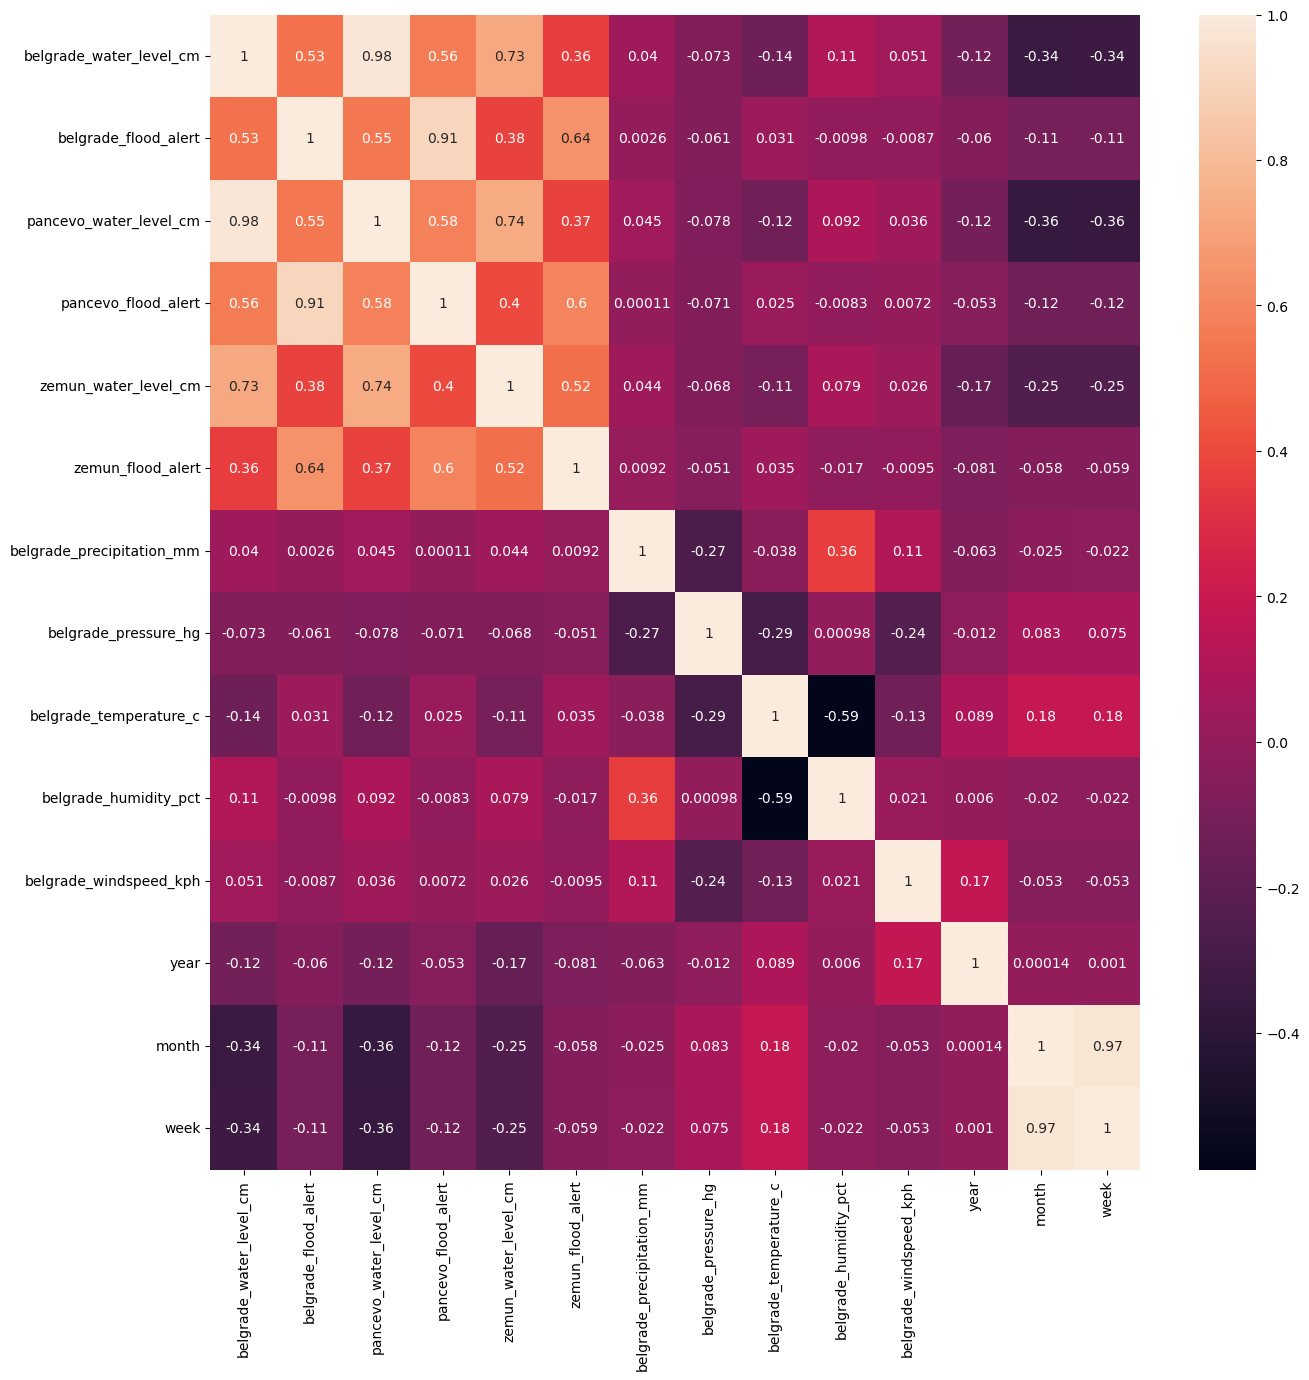

In [55]:
plt.figure(figsize=(15,15))
corr_matrix = data.drop(columns={'date', 'day'}).corr()
sns.heatmap(corr_matrix, annot=True)

The heatmap shows that we have 

1. high correlation between some features (|correlation|> 0.75):
- belgrad and pancevo water level = 0.98
- belgrad and pancevo flood alert = 0.91
- month and week = 0.97 (we can exclude on of them)
2. low correlation (|correlation|< 0.5) between belgrad water level and some features
- precipitation = 0.04
- pressure = -0.073
- temperature = -0.14
- humidity = 0.11
- windspeed = 0.051
3. low correlation (|correlation|< 0.5) between the water level of other two stations and some features.

According to the correlation coefficients, water levels do not depend on environmental features such as precipitation, pressure, temperature, humidity and wind speed. Water levels have relatively strong correlation between each other and flood alerts.

### Floods data investigation

Several huge floods are known in Belgrade from the media. Let us consider two of them and investigate how features were changing.

May 2014 and June 2019

### May 2014

The reason of this flood was strong rainfall.

In [59]:
flood_may2014 = data[data.year==2014]
flood_may2014 = flood_may2014[data.month==5]

C:\Users\Kseniya\AppData\Local\Temp\ipykernel_1780\1682720653.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flood_may2014 = flood_may2014[data.month==5]


In [60]:
# plotting environmental features

def attributes_plots(data):
    fig, ax = plt.subplots(8, 1, figsize=(15, 15))
    
    def plot_settings(data, i, attribute, label, color):
        ax[i].plot(data['date'], data[attribute], label=label, color=color)
        ax[i].legend()
        ax[i].grid()
    
    plot_settings(data, 0, 'zemun_water_level_cm', 'zemun water level', 'b')
    plot_settings(data, 1, 'belgrade_water_level_cm', 'belgrad water level', 'r')
    plot_settings(data, 2, 'pancevo_water_level_cm', 'pancevo water level','g')
    plot_settings(data, 3, 'belgrade_precipitation_mm', 'precipitation', 'black')
    plot_settings(data, 4, 'belgrade_pressure_hg', 'pressure', 'c')
    plot_settings(data, 5, 'belgrade_temperature_c', 'temperature', 'm')
    plot_settings(data, 6, 'belgrade_humidity_pct', 'humidity', 'y')
    plot_settings(data, 7, 'belgrade_windspeed_kph', 'windspeed', 'purple')

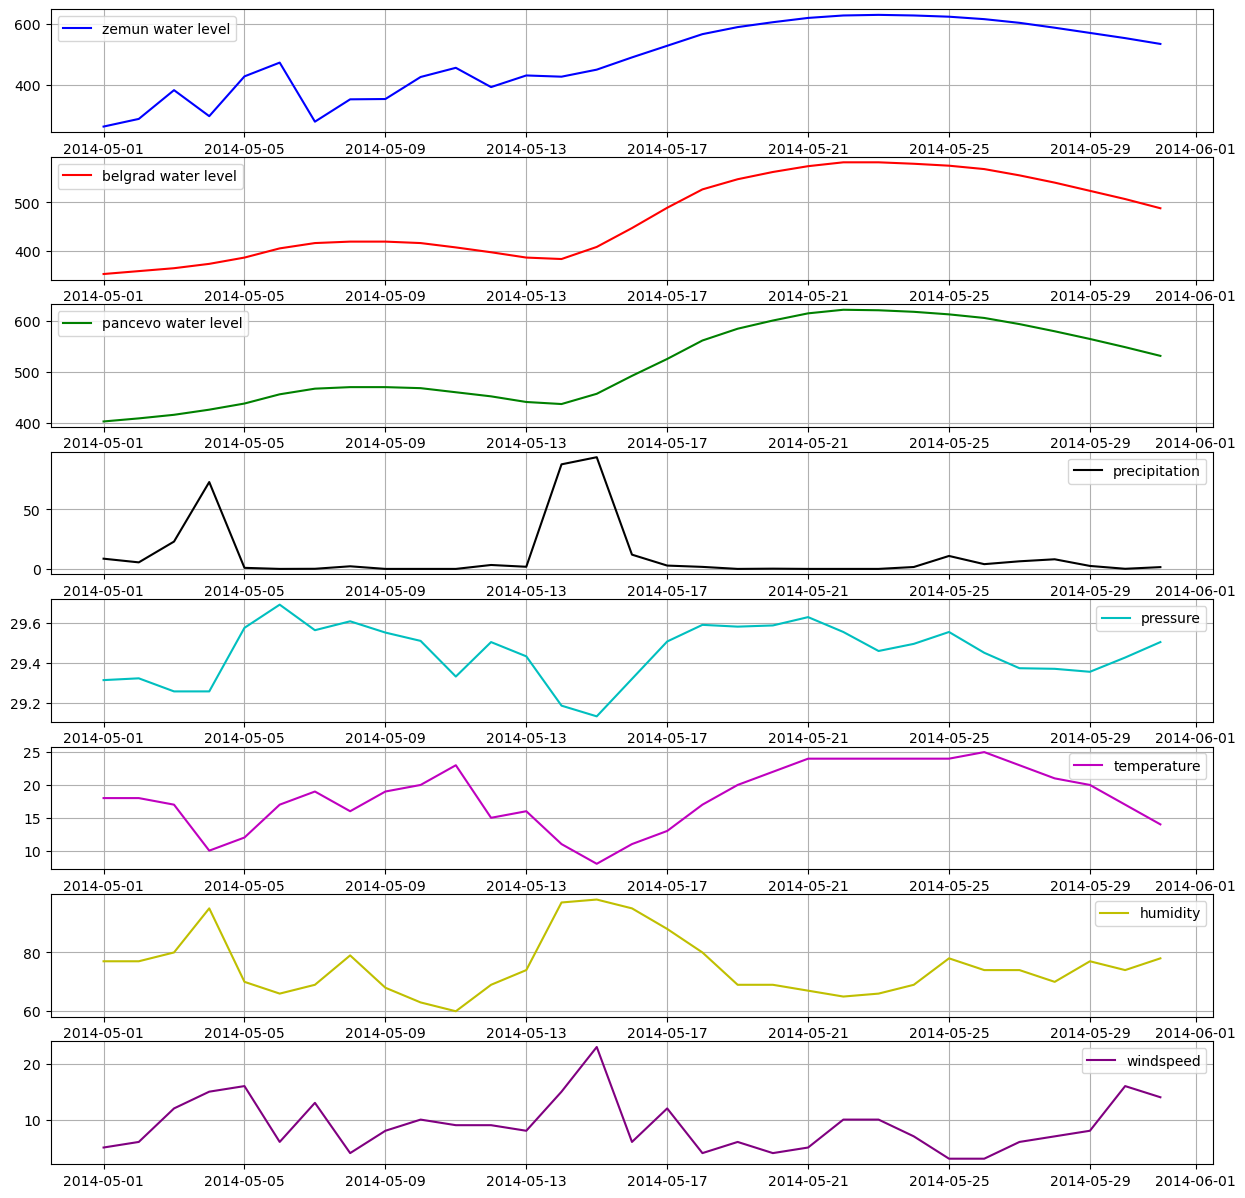

In [61]:
attributes_plots(flood_may2014)

The graphs show that before the water level was starting to increase significantly all the environmental parameters had had a dramatic jump on one day:
1. precipitation had risen from 0 to 100 mm 
2. pressure had fallen 
3. temperature had fallen from 16 to 5 Celsius degrees
4. humidity had risen from 73 to about 100 %
5. windspeed had risen from 8 to 23 m/s

Besides, there were no water consumers on the Zemun station.

<AxesSubplot: >

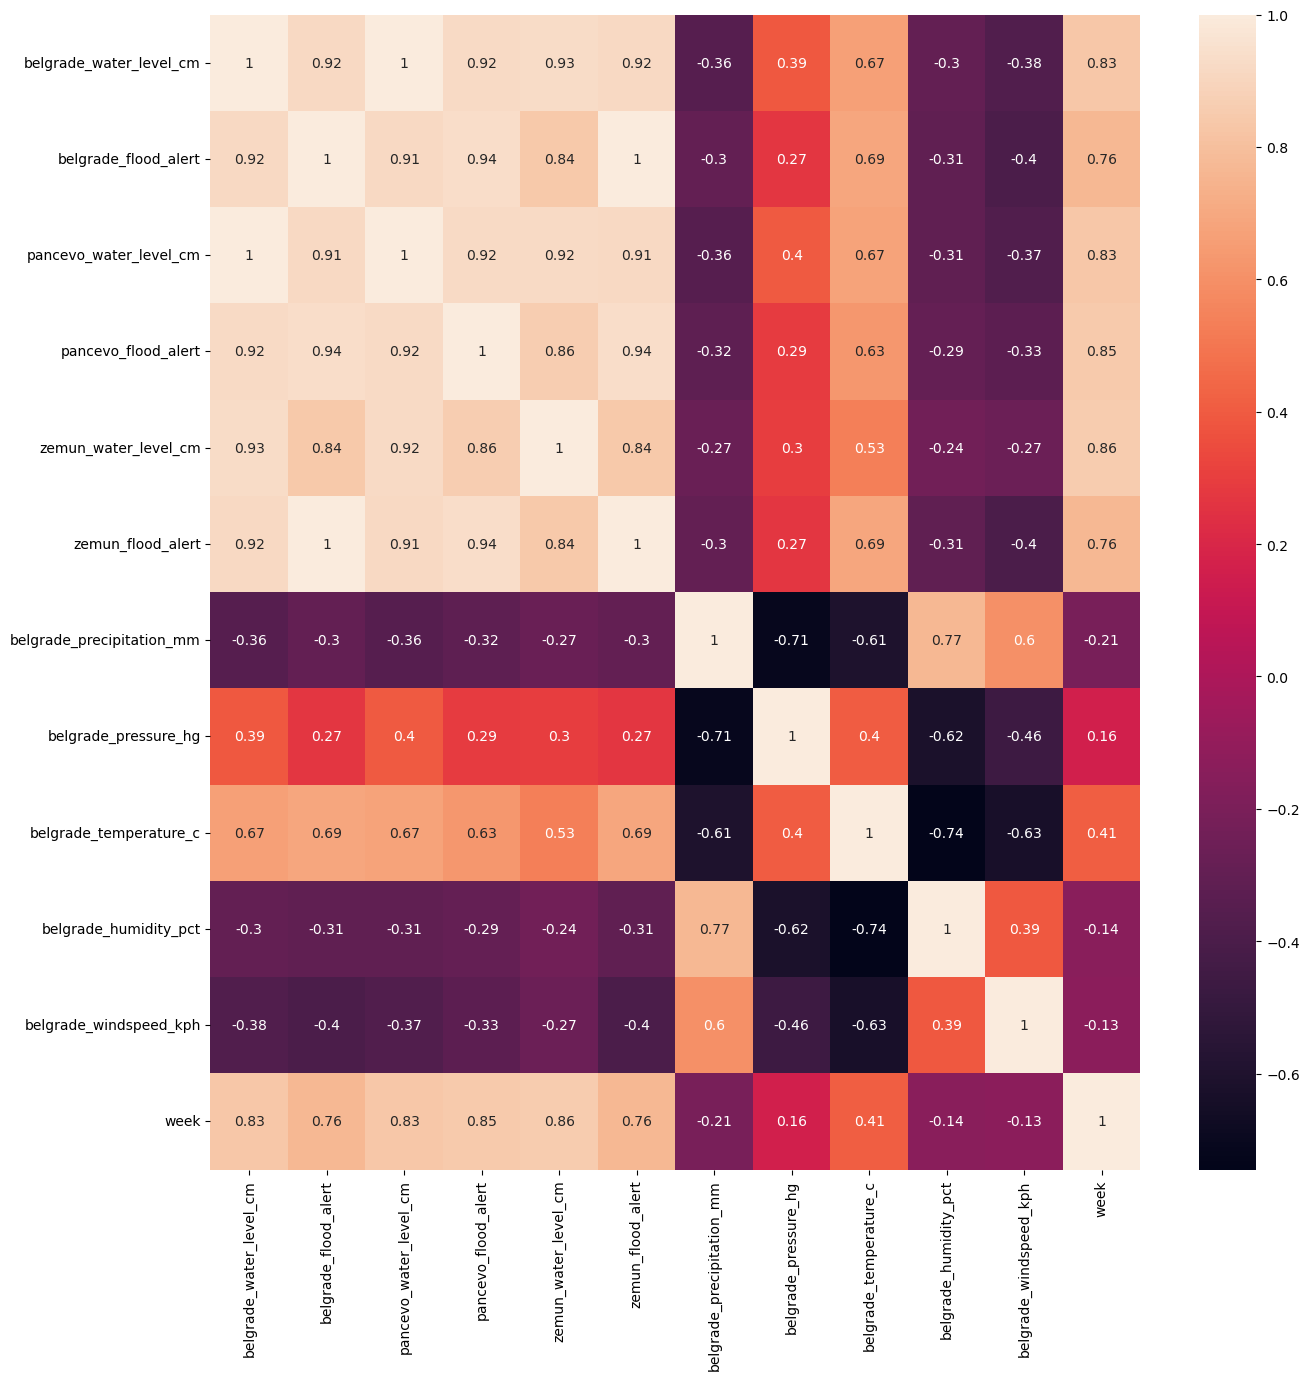

In [63]:
plt.figure(figsize=(15,15))
corr_matrix_flood_may2014 = flood_may2014.drop(columns={'date', 'year', 'month', 'day'}).corr()
sns.heatmap(corr_matrix_flood_may2014, annot=True)

The matrix shows that correlations are different from the general feature investigation:
1. the temperature and water levels have more than 0.5 
2. the significance of other environmental features have increased as well

### June 2019

In [68]:
flood_june2019 = data[data.year==2019]
flood_june2019 = flood_june2019[data['month'].isin([5,6])]

C:\Users\Kseniya\AppData\Local\Temp\ipykernel_1780\18109129.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  flood_june2019 = flood_june2019[data['month'].isin([5,6])]


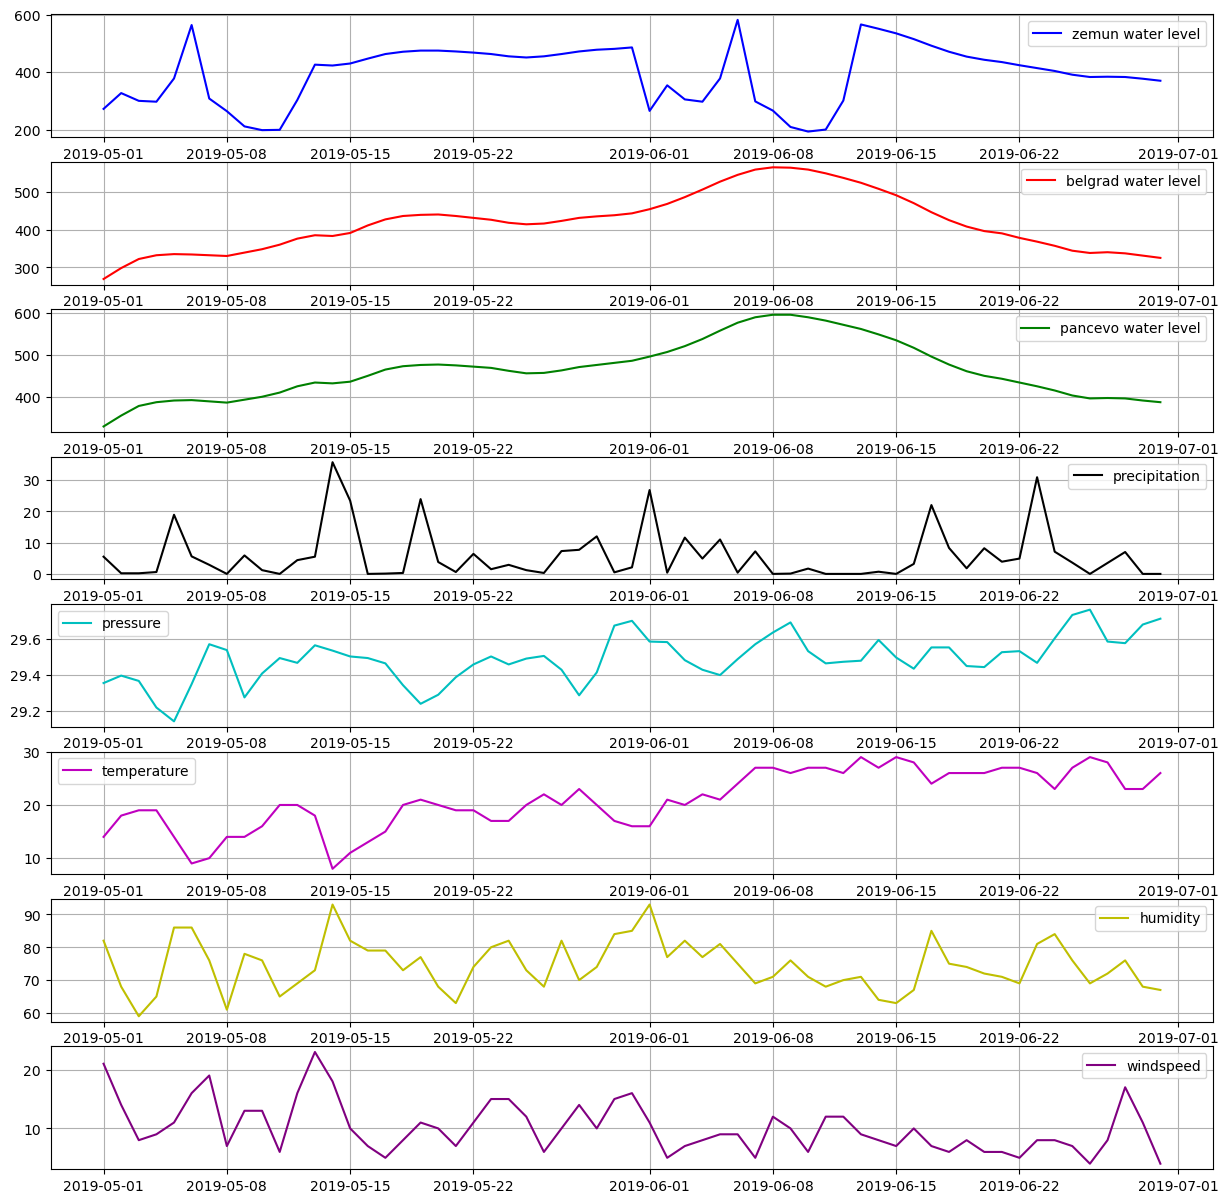

In [69]:
attributes_plots(flood_june2019)

The graphs show that the water level increasing was the consequence of precipitation, temperature and wind speed fluctuations. The dramatic jumps of wind speed and temperature combined with rainfall could be the reason for the flood.

Nevertheless, there were water consumers on the Zemun station in the beginning of June.

<AxesSubplot: >

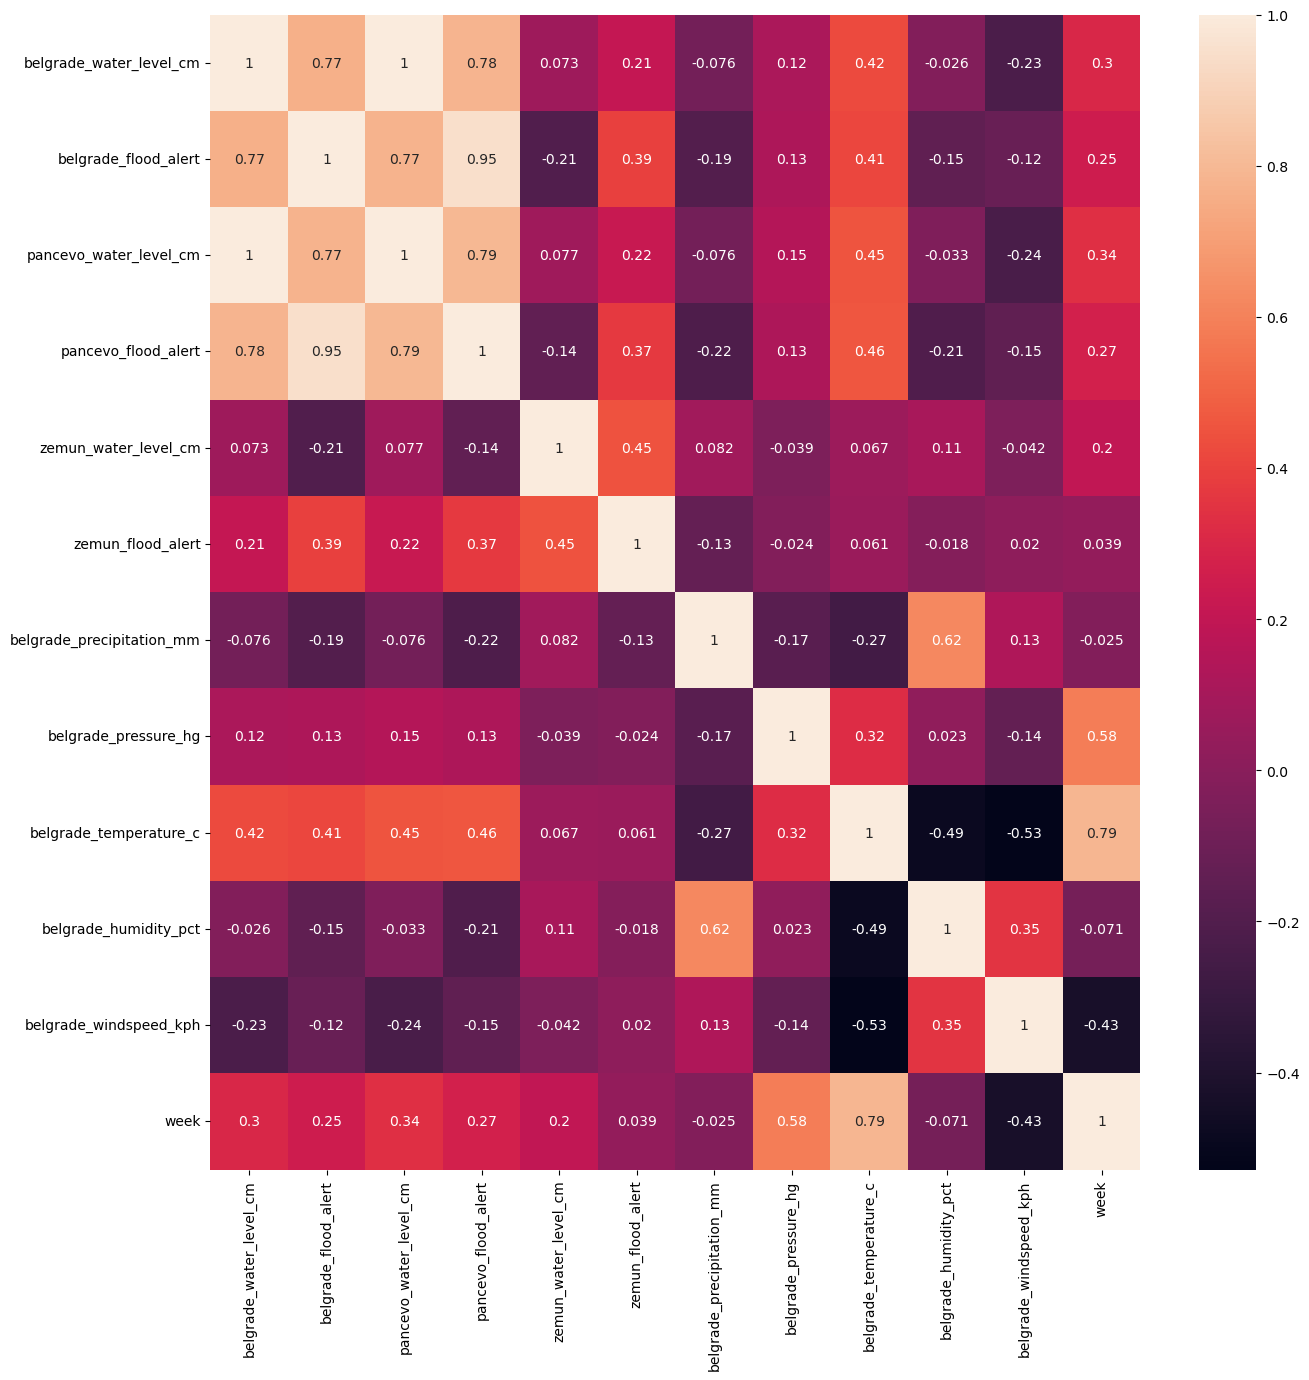

In [70]:
plt.figure(figsize=(15,15))
corr_matrix_flood_june2019 = flood_june2019.drop(columns={'date', 'year', 'month', 'day'}).corr()
sns.heatmap(corr_matrix_flood_june2019, annot=True)

The matrix shows some temperature impact, but humidity and wind speed correlations with water levels remain low.

**Conclusion**: 
1. The investigations of particular floods give different results than general feature investigation.
2. Some assumptions could be made here. Probably, the water consumption on the Zemun station has some impact on the Belgrad and Pancevo stations water levels. Water extraction happens at the beginning of a month. The flood in May 2014 happened in the middle of the month while the flood in June 2019 happened in the beginning of the month. In the second case, the water level decreased faster. 
3. Therefore, building the water extraction infrastructure could be more efficient than just flood prediction, because floods damage the economics anyway.